# Data Visualisation Lab 3

### Yash Maniya (B20CS033)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
from shapely.geometry import Point, LineString
import shapefile as shp
import geopandas as gpd
sns.set_style('whitegrid')

### Q1 : Toronto Accomodation Prices
Download `listing.csv` for any city of your choice. Draw the map of city use a bubble map to show the price of the accommodation in the map corresponding to their Geo-location. http://insideairbnb.com/get-the-data/

In [2]:
df = gpd.read_file('./listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
0,1419,Home in Toronto Â· â˜…5.0 Â· 5 bedrooms Â· 7 b...,1565,Alexandra,,Little Portugal,43.6459,-79.42423,Entire home/apt,,28,6,2017-08-07,0.06,1,0,0,,None
1,8077,Rental unit in Toronto Â· â˜…4.84 Â· 1 bedroom...,22795,Kathie & Larry,,Waterfront Communities-The Island,43.6408,-79.37673,Private room,100,180,169,2013-08-27,0.96,2,0,0,,None
2,26654,Condo in Toronto Â· â˜…4.79 Â· 1 bedroom Â· 2 ...,113345,Adela,,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,145,28,42,2023-09-01,0.27,5,77,2,,None
3,27423,Rental unit in Toronto Â· â˜…4.93 Â· Studio Â·...,118124,Brent,,South Riverdale,43.66884,-79.32725,Entire home/apt,75,90,28,2023-08-31,0.17,1,215,1,,None
4,30931,Rental unit in Toronto Â· 1 bedroom Â· 2 beds ...,22795,Kathie & Larry,,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,134,180,1,2010-08-11,0.01,2,0,0,,None


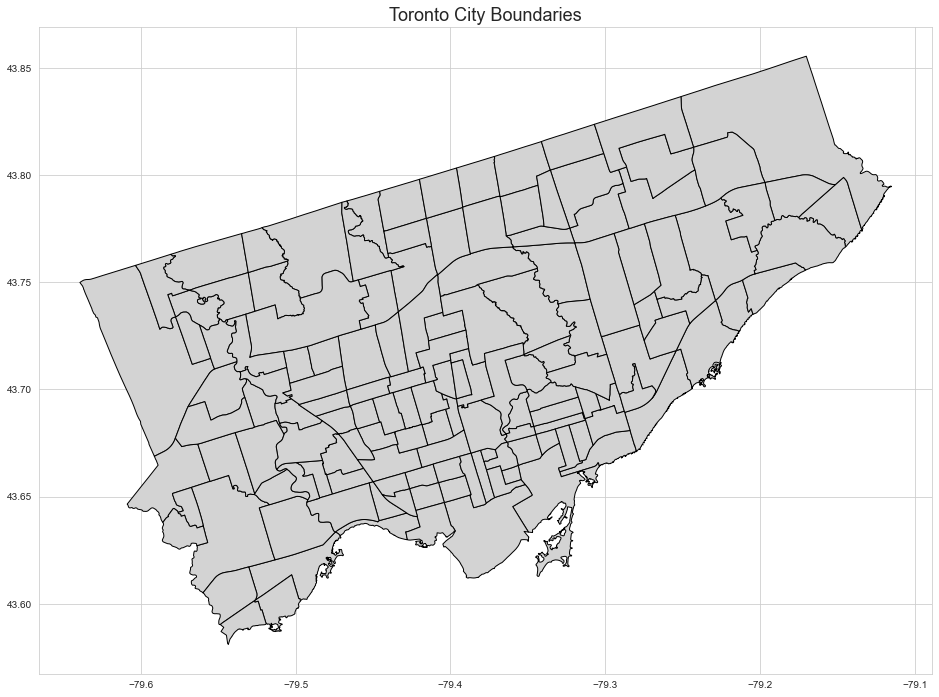

In [33]:
city_boundaries_path = "./neighbourhoods.geojson"
city_boundaries = gpd.read_file(city_boundaries_path)

df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

fig, ax = plt.subplots(figsize=(16, 12))

city_boundaries.plot(ax=ax, color='lightgray', edgecolor='black')

plt.title('Toronto City Boundaries', fontsize=18)

plt.show()

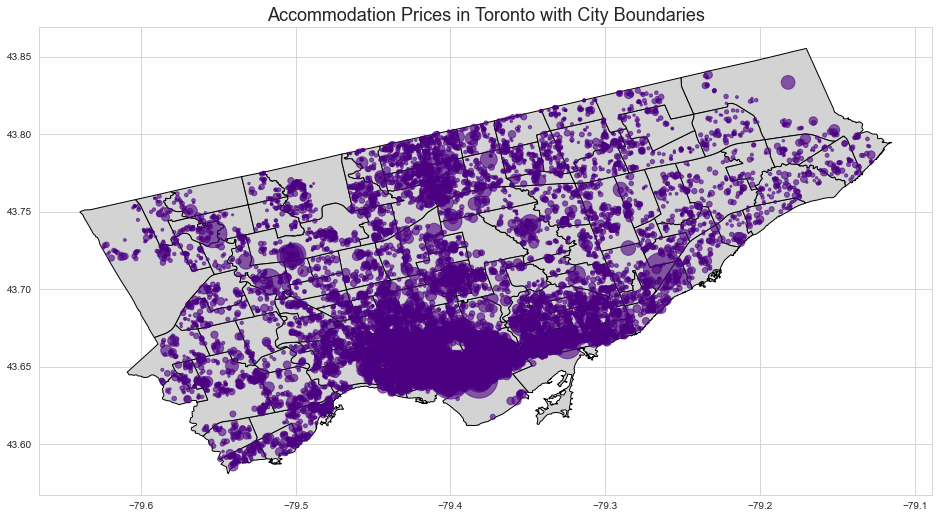

In [38]:
city_boundaries_path = "./neighbourhoods.geojson"
city_boundaries = gpd.read_file(city_boundaries_path)

df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

fig, ax = plt.subplots(figsize=(16, 12))

city_boundaries.plot(ax=ax, color='lightgray', edgecolor='black')

gdf.plot(ax=ax, color='indigo', alpha=0.6, markersize=df['price'].astype(float)/7, legend=True)

plt.title('Accommodation Prices in Toronto with City Boundaries', fontsize=18)

plt.show()

### Q2 Silk Route
Draw the Silk Route in the world map. Collect all the necessary data (cities through which silk route moved and corresponding geo location) from google. Some reference available in the following site:
https://www.arcgis.com/home/item.html?id=848554492f0444a88287505f696b3212&view=list&sortOrder=desc&sortField=defaultFSOrder#data

C:\Users\YASH MANIYA\AppData\Local\Temp\ipykernel_21952\2028299830.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


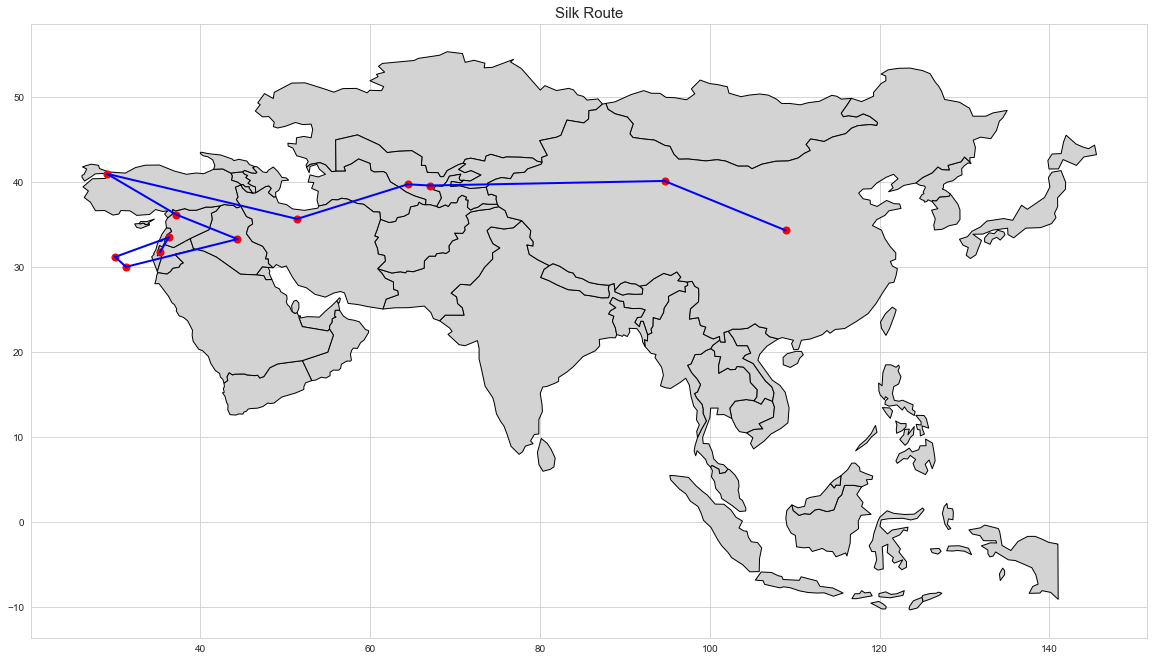

In [58]:
data = {
    'City': ['Xi\'an', 'Dunhuang', 'Samarkand', 'Bukhara', 'Tehran', 'Istanbul', 'Aleppo', 'Baghdad', 'Cairo', 'Alexandria', 'Damascus', 'Jerusalem'],
    'Latitude': [34.3416, 40.1631, 39.6270, 39.7681, 35.6895, 41.0082, 36.2012, 33.3152, 30.0444, 31.2156, 33.5138, 31.7683],
    'Longitude': [108.9398, 94.6626, 66.9846, 64.4305, 51.3890, 28.9784, 37.1612, 44.3661, 31.2357, 29.9553, 36.2765, 35.2137]
}

cities_df = pd.DataFrame(data)
gdf_cities = gpd.GeoDataFrame(cities_df, geometry=gpd.points_from_xy(cities_df['Longitude'], cities_df['Latitude']))

fig, ax = plt.subplots(figsize=(20, 16))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
asia = world[world['continent'] == 'Asia']

asia.plot(ax=ax, color='lightgray', edgecolor='black')
gdf_cities.plot(ax=ax, color='red', marker='o', markersize=50)

for i in range(len(gdf_cities)-1):
    plt.plot([gdf_cities['Longitude'][i], gdf_cities['Longitude'][i+1]],
             [gdf_cities['Latitude'][i], gdf_cities['Latitude'][i+1]], color='blue', linewidth=2)

plt.title('Silk Route', fontsize=15)
plt.show()
